In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/mall-customers'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mall-customers/Mall_Customers.csv


In [15]:
!pip install simpsom

In [17]:
import pandas as pd
import numpy as np
import simpsom as sps
from sklearn.cluster import KMeans

In [19]:
data = pd.read_csv("/kaggle/input/mall-customers/Mall_Customers.csv")
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000    

In [20]:
data['Genre'] = data['Genre'].map({'Male': 1, 'Female': 0})


In [21]:
x=data.drop(['Annual Income (k$)', 'Spending Score (1-100)'],axis=1)

In [23]:
net=sps.SOMNet(20,20, x.values,PBC=True)

Periodic Boundary Conditions active.
The weights will be initialized with PCA.


In [24]:
net.train(train_algo='batch',start_learning_rate=0.01,epochs=10000)

The map will be trained with the batch algorithm.
Training SOM... done!


In [26]:
hrt = np.array((net.project(x.values)))
kmeans = KMeans(n_clusters = 3, max_iter = 300, random_state = 0)

/opt/conda/lib/python3.10/site-packages/simpsom/network.py:629: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter([pos[0]-0.125+random.random()*0.25 for pos in bmu_list],


<Figure size 640x480 with 0 Axes>

In [30]:
y_kmeans = kmeans.fit_predict(hrt)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [31]:
y_kmeans
data['kümeler'] = y_kmeans

In [32]:
print("1 numaralı küme:")
print(data[data["kümeler"] == 0].head(5))

1 numaralı küme:
   CustomerID  Genre  Age  Annual Income (k$)  Spending Score (1-100)  kümeler
0           1      1   19                  15                      39        0
1           2      1   21                  15                      81        0
2           3      0   20                  16                       6        0
3           4      0   23                  16                      77        0
4           5      0   31                  17                      40        0


In [33]:
print("3 numaralı küme:")
print(data[data["kümeler"] == 2].head(5))

3 numaralı küme:
    CustomerID  Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
40          41      0   65                  38                      35   
53          54      1   59                  43                      60   
56          57      0   51                  44                      50   
57          58      1   69                  44                      46   
59          60      1   53                  46                      46   

    kümeler  
40        2  
53        2  
56        2  
57        2  
59        2  


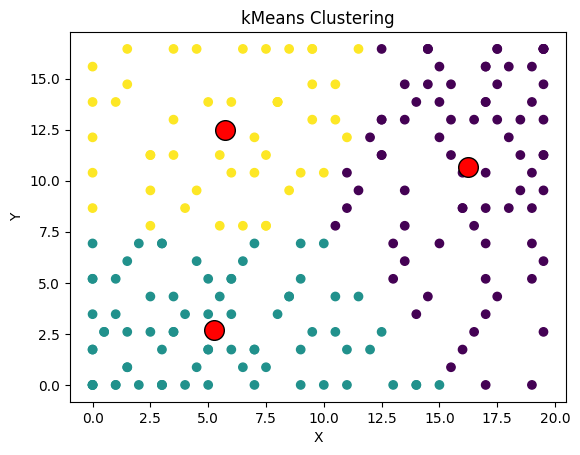

In [34]:
import matplotlib.pyplot as plt 
labels = kmeans.labels_
centers = kmeans.cluster_centers_
plt.scatter(hrt[:,0],hrt[:,1], c=labels, cmap='viridis')
plt.scatter(centers[:,0],centers[:,1], marker='o', s=200, c='red', edgecolor= 'k')
plt.xlabel('X')
plt.ylabel('Y')
plt.title("kMeans Clustering")
plt.show()